Usage: python infinite_square_well.py [mass_kg] [well_width_m]
Using default values for electron in a 1 nm well.
Eigenenergies (eV):
  State 1: 0.376023 eV
  State 2: 1.503998 eV
  State 3: 3.383651 eV
  State 4: 6.014523 eV
  State 5: 9.395971 eV


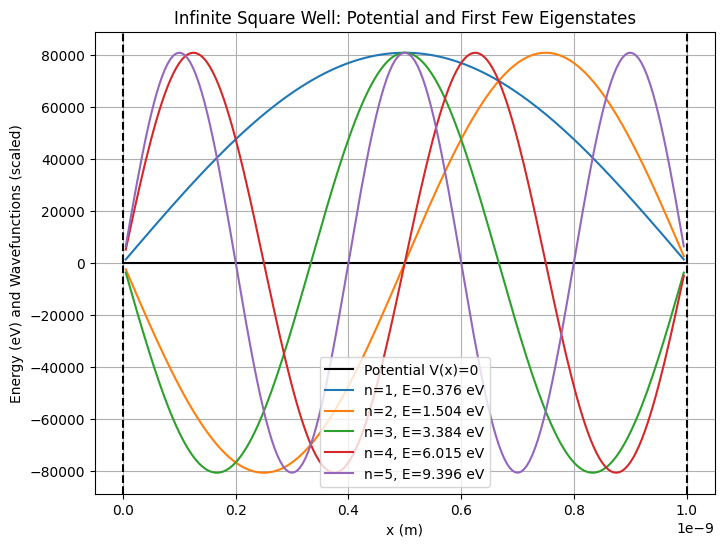

In [ ]:
#!/usr/bin/env python3

import sys
import numpy as np
import matplotlib.pyplot as plt

def solve_infinite_square_well(mass, L, N=200):
    """
    Solve the 1D infinite square well problem (0 < x < L) using
    a finite-difference approximation of the second derivative.

    Parameters
    ----------
    mass : float
        Mass of the particle (in kg).
    L : float
        Width of the well (in meters).
    N : int, optional
        Number of interior grid points (default=200).

    Returns
    -------
    energies : ndarray
        Array of eigenvalues (energies in Joules), sorted ascending.
    wavefuncs : ndarray
        2D array of eigenvectors (wavefunctions). wavefuncs[:, i]
        is the i-th eigenfunction at the discrete grid points.
    x : ndarray
        1D array of the interior coordinate points, shape (N,).
    """
    # Physical constants
    hbar = 1.054571817e-34  # J*s (reduced Planck's constant)

    # Discretize the space
    # We'll create N interior points, excluding the boundaries x=0 and x=L.
    # The grid spacing is then dx = L / (N+1).
    dx = L / (N + 1)
    x = np.linspace(dx, L - dx, N)  # interior points only

    # Kinetic energy operator in 1D using finite differences:
    # d^2 psi / dx^2 ~ (psi_{i+1} - 2 psi_i + psi_{i-1}) / dx^2
    # So the matrix representation of d^2/dx^2 for N interior points is:
    # D2 = (1, -2, 1) on the diagonals.
    diag = np.full(N, -2.0)
    offdiag = np.ones(N-1)
    D2 = (np.diag(diag) +
          np.diag(offdiag, k=1) +
          np.diag(offdiag, k=-1))

    # Build the Hamiltonian: H = - (hbar^2 / 2m) * d^2/dx^2
    # Inside the infinite well, V=0, so we only have kinetic term.
    factor = - (hbar**2) / (2.0 * mass * dx**2)
    H = factor * D2

    # Diagonalize H to get eigenvalues (energies) and eigenvectors (wavefunctions)
    eigenvals, eigenvecs = np.linalg.eigh(H)

    # Sort eigenvalues and eigenvectors in ascending order
    idx = np.argsort(eigenvals)
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]

    # Each column of eigenvecs is an eigenfunction on the discrete grid.
    # We can normalize them so that sum(|psi|^2) * dx = 1
    for i in range(eigenvecs.shape[1]):
        norm = np.sqrt(np.sum(np.abs(eigenvecs[:, i])**2) * dx)
        eigenvecs[:, i] /= norm

    return eigenvals, eigenvecs, x


def main():
    """
    Main function that:
      1) Reads mass (kg) and well width L (m) from the command line (or sets defaults).
      2) Solves the infinite square well for the first few states.
      3) Prints energies (in eV) and plots the well + wavefunctions.
    """
    # Physical constants
    eV_to_J = 1.602176634e-19  # 1 eV in Joules

    # -- Parse inputs from command line or set default values --
    if len(sys.argv) == 3:
        mass = float(sys.argv[1])      # in kg
        L = float(sys.argv[2])         # in meters
    else:
        print("Usage: python infinite_square_well.py [mass_kg] [well_width_m]")
        print("Using default values for electron in a 1 nm well.")
        mass = 9.10938356e-31  # electron mass in kg
        L = 1.0e-9             # 1 nm

    # Number of grid points (you can adjust for accuracy)
    N = 200

    # Solve for eigenvalues and eigenvectors
    energies_J, wavefuncs, x = solve_infinite_square_well(mass, L, N=N)

    # Convert energies to eV
    energies_eV = energies_J / eV_to_J

    # Print first few eigenenergies
    print("Eigenenergies (eV):")
    for i, E in enumerate(energies_eV[:5], start=1):
        print(f"  State {i}: {E:.6f} eV")

    # -- Plot the potential well, the energies, and the wavefunctions --
    # Infinite well potential: V=0 inside, infinite outside.
    # We'll just plot V=0 in [0, L] and show it as "infinite" at the boundaries.
    plt.figure(figsize=(8,6))

    # Plot the well (V=0) as a black line from x=0 to x=L
    plt.plot([0, L], [0, 0], 'k-', label="Potential V(x)=0")

    # We only plot the first few wavefunctions
    n_to_plot = 5
    for i in range(n_to_plot):
        # Shift wavefunction so it sits on top of its energy
        # We'll scale wavefunction amplitude so it's visible
        psi = wavefuncs[:, i]
        E = energies_eV[i]
        scale = 0.2 * (max(energies_eV[:n_to_plot]) - min(energies_eV[:n_to_plot]))
        y_psi = psi * scale + E  # shift by E and scale amplitude

        # Plot the wavefunction
        plt.plot(x, y_psi, label=f"n={i+1}, E={E:.3f} eV")

    # Mark the boundaries with vertical dashed lines
    plt.axvline(x=0, color='k', linestyle='--')
    plt.axvline(x=L, color='k', linestyle='--')

    plt.title("Infinite Square Well: Potential and First Few Eigenstates")
    plt.xlabel("x (m)")
    plt.ylabel("Energy (eV) and Wavefunctions (scaled)")
    plt.legend()
    plt.grid(True)
    plt.show()


if __name__ == "__main__":
    main()
